In [79]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [80]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column. 

market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [81]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [82]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df.select_dtypes(include=['float64', 'int64']))



In [83]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.select_dtypes(include=['float64', 'int64']).columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index.values

# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [104]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


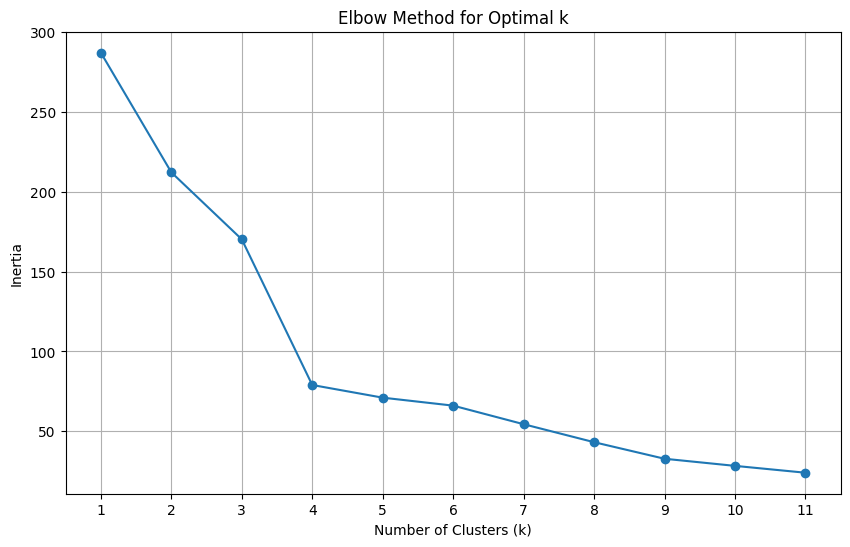

In [85]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer: 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [86]:
# Initialize the K-Means model using the best value for k

kmeans_best = KMeans(n_clusters=4, random_state=42)

In [87]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [88]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_best.predict(scaled_df)

# View the resulting array of cluster values.
cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [89]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [90]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['cluster'] = cluster_labels

# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Figure size 1000x600 with 0 Axes>

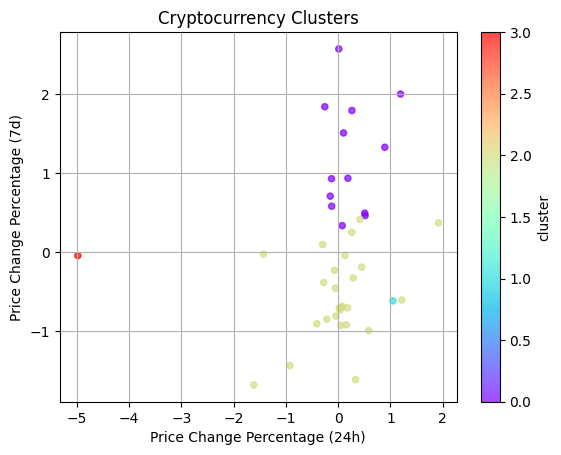

In [91]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

plt.figure(figsize=(10, 6))
clustered_df.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='cluster', colormap='rainbow', alpha=0.7)
plt.title('Cryptocurrency Clusters')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid()
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [92]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [93]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_components = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [94]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

Explained variance by each principal component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: [ \text{Total Explained Variance} = \text{PC1} + \text{PC2} + \text{PC3} ]

Substituting in the values:

[ \text{Total Explained Variance} = 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166 ]

Thus, the total explained variance of the three principal components is approximately 0.8950, or 89.50%. This means that these three components together explain about 89.50% of the variance in the original dataset.

In [95]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index.values

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [107]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = [] 

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k,"inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,11,256.874086
1,11,182.339530
2,11,140.431833
3,11,49.665497
4,11,42.051901
5,11,31.749005
6,11,28.031869
7,11,19.451747
8,11,13.814082
9,11,10.630648


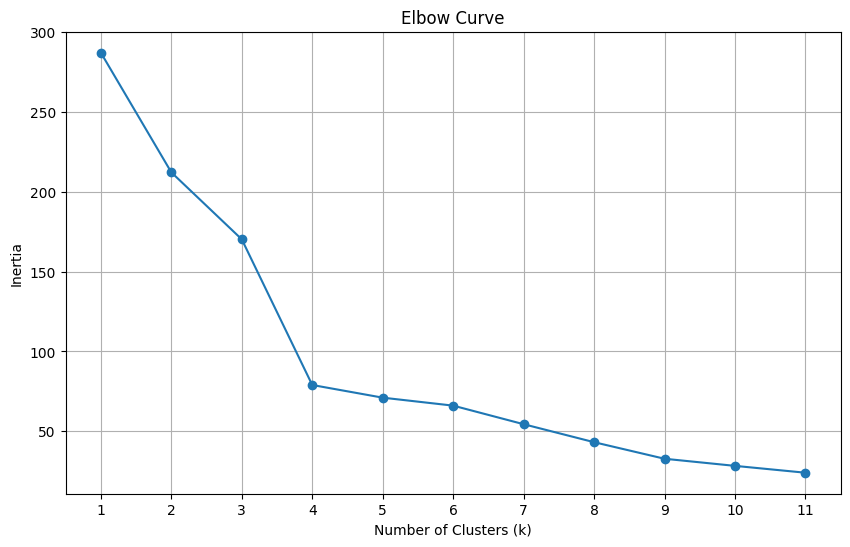

In [106]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:no, hardly

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [98]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [99]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

In [108]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
clusters

array([ 8,  8,  3,  3, 10,  6,  4,  8,  8,  0,  7,  3,  3, 10,  0,  0,  7,
        0,  8,  3,  7,  8,  3,  3,  3,  3,  0,  7,  8,  5,  0,  0,  2,  0,
        9,  3,  1,  7,  0,  3,  3], dtype=int32)

In [109]:
# Create a copy of the DataFrame with the PCA data
pca_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_with_clusters['Cluster'] = clusters

# Display sample data
pca_with_clusters.head(10)

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,8
ethereum,-0.458261,0.458466,0.952877,8
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,10
binancecoin,-0.516534,1.388377,0.804071,6
chainlink,-0.450711,0.517699,2.846143,4
cardano,-0.345600,0.729439,1.478013,8
litecoin,-0.649468,0.432165,0.600303,8


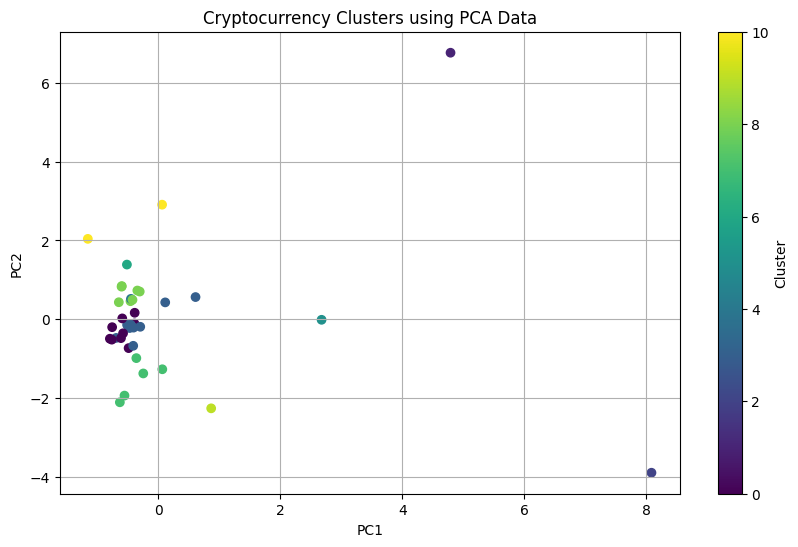

In [110]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

plt.figure(figsize=(10, 6))
plt.scatter(pca_with_clusters['PC1'], pca_with_clusters['PC2'], c=pca_with_clusters['Cluster'], cmap='viridis', marker='o')
plt.title('Cryptocurrency Clusters using PCA Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [111]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)
pca_component_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:
* PC1:
Strongest positive influence: price_change_percentage_200d (0.594468)
Strongest negative influence: price_change_percentage_24h (-0.416728)
PC2:
Strongest positive influence: price_change_percentage_30d (0.562182)
Strongest negative influence: price_change_percentage_1y (-0.150789)
PC3:
Strongest positive influence: price_change_percentage_7d (0.787670)
Strongest negative influence: price_change_percentage_60d (-0.361377) 
    